Integradora 2.2

---



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy_financial as nf

In [33]:
flujo_const=pd.read_excel('Flujo de fondos construccion.xlsx')
flujo_const

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fuente:,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,beta desapalancado,NaN,1.450000,NaN,https://pages.stern.nyu.edu/~adamodar/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,beta,1.45,NaN,NaN,prima de riesgo país,NaN,11.620000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,E(rm-rf),4.5,NaN,NaN,tasa libre de riesgo,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rf,4,NaN,NaN,rm,NaN,8.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ke=ko,10.525,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
flujo_de_fondos_row = flujo_const.iloc[35, 1:30]
flujo_de_fondos_lista = flujo_de_fondos_row.tolist()
print(flujo_de_fondos_lista)

[-11555.5, -13481.416666666666, np.float64(-13481.416666666666), -395481.4166666667, np.float64(-32740.583333333332), np.float64(-32740.583333333332), np.float64(96264.91666666667), 16889.411111111105, np.float64(35159.41111111111), np.float64(53429.4111111111), np.float64(-26491.422222222216), np.float64(-8221.422222222227), np.float64(-8221.422222222227), np.float64(-8221.422222222227), np.float64(-8221.422222222227), np.float64(-8221.422222222227), np.float64(-8221.422222222227), np.float64(-8221.422222222227), np.float64(-22554.088888888888), np.float64(9694.32777777777), np.float64(9694.32777777777), np.float64(9694.32777777777), np.float64(23549.194444444438), np.float64(5279.194444444447), np.float64(1341.8611111111077), np.float64(-49598.054298642535), np.float64(0.0), np.float64(374532.98642533936), np.float64(277336.00183239195)]


In [35]:
flujo_construccion = [float(x) for x in flujo_de_fondos_lista]
print(flujo_construccion)

[-11555.5, -13481.416666666666, -13481.416666666666, -395481.4166666667, -32740.583333333332, -32740.583333333332, 96264.91666666667, 16889.411111111105, 35159.41111111111, 53429.4111111111, -26491.422222222216, -8221.422222222227, -8221.422222222227, -8221.422222222227, -8221.422222222227, -8221.422222222227, -8221.422222222227, -8221.422222222227, -22554.088888888888, 9694.32777777777, 9694.32777777777, 9694.32777777777, 23549.194444444438, 5279.194444444447, 1341.8611111111077, -49598.054298642535, 0.0, 374532.98642533936, 277336.00183239195]


In [36]:
rf=4
beta=1.45
rm=8.5
ko_anual=rf+beta*(rm-rf)
print(ko_anual)

10.524999999999999


In [37]:
ko_mensual=(1+(ko_anual/100))**(30/365)-1
print(ko_mensual)

0.008258977940461376


Calculamos las métricas financieras

---



In [38]:
# Calculamos el VAN
van_nuevos = nf.npv(ko_mensual, flujo_construccion)
print(f"\nEl Valor Actual Neto (VAN) es: {van_nuevos:.2f}")


El Valor Actual Neto (VAN) es: 137478.66


In [39]:
# Calculamos la TIR
tir_construccion = nf.irr(flujo_construccion)
print(f"La Tasa Interna de Retorno (TIR) es: {tir_construccion:.2%}")

La Tasa Interna de Retorno (TIR) es: 2.12%


In [40]:
# Calculamos la TIRM

tirm_nuevos = nf.mirr(flujo_construccion, ko_mensual, tir_construccion)
print(f"La Tasa Interna de Retorno Modificada (TIRM) es: {tirm_nuevos:.2%}")


La Tasa Interna de Retorno Modificada (TIRM) es: 1.85%


In [41]:
# Calculamos el PRD (Periodo de Recuperación Descontado)
flujo_descontado_acumulado = 0
prd_contruccion = None

for t in range(len(flujo_construccion)):
    # Calcular el flujo de caja descontado para el período actual
    if t == 0:
        flujo_descontado_periodo = flujo_construccion[t]
    else:
        flujo_descontado_periodo = flujo_construccion[t] / (1 + ko_mensual)**t

    # Actualizar el flujo de caja descontado acumulado
    flujo_descontado_acumulado += flujo_descontado_periodo

    # Verificar si el flujo de caja descontado acumulado es positivo y el PRD no ha sido establecido
    if flujo_descontado_acumulado >= 0 and prd_contruccion is None:
        # El período de recuperación está en este período (t)
        # Calcular el flujo de caja descontado acumulado antes de este período
        flujo_descontado_acumulado_anterior = flujo_descontado_acumulado - flujo_descontado_periodo

        # Calcular la cantidad restante necesaria para llegar a cero
        cantidad_restante_descontada = abs(flujo_descontado_acumulado_anterior)

        # Calcular la parte fraccional del período usando interpolación lineal
        # La parte fraccional es la cantidad restante necesaria dividida por el flujo de caja descontado del período actual
        # Usamos abs(flujo_descontado_periodo) para manejar casos en los que el flujo descontado podría ser negativo pero el acumulado se está volviendo positivo
        periodo_fraccional = cantidad_restante_descontada / abs(flujo_descontado_periodo)

        # El período de recuperación es el período anterior (t-1) más la parte fraccional
        prd_contruccion = t -1 + periodo_fraccional
        break # Salir del bucle una vez que se encuentra el PRD

if prd_contruccion is not None:
    # Convertir meses a años para la salida final
    prd_años = prd_contruccion / 12
    print(f"El Periodo de Recuperación Descontado (PRD) es: {prd_años:.2f} años")
else:
    print("La inversión inicial no se recupera dentro del período del análisis descontado.")

El Periodo de Recuperación Descontado (PRD) es: 2.28 años


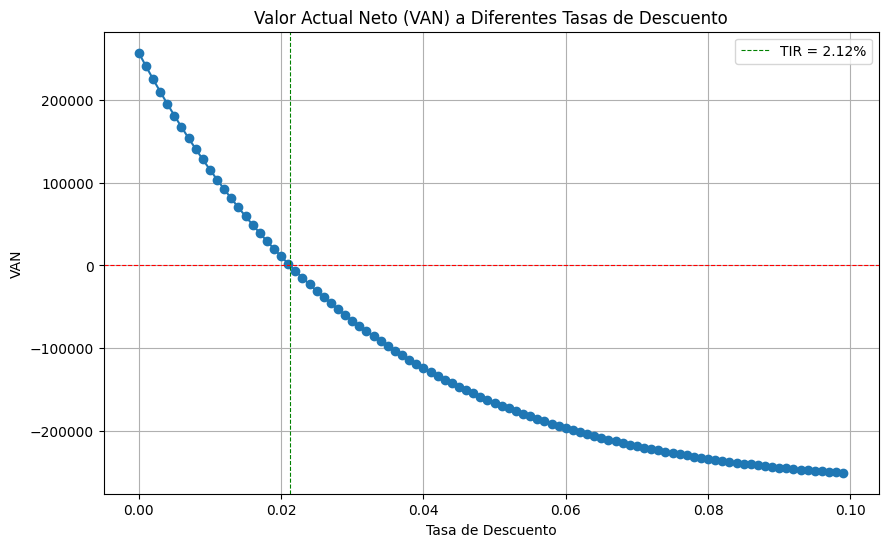

In [42]:
# Definir los flujos de caja del proyecto
flujos_van = flujo_construccion

# Crear un rango de tasas de descuento para evaluar el VAN
# Por ejemplo, de 0% a 50% con incrementos de 1%
tasas_descuento_rango = np.arange(0, 0.1, 0.001)

# Calcular el VAN para cada tasa de descuento en el rango
van_por_tasa = [nf.npv(tasa, flujos_van) for tasa in tasas_descuento_rango]

# Visualizar el VAN a distintas tasas de descuento
plt.figure(figsize=(10, 6))
plt.plot(tasas_descuento_rango, van_por_tasa, marker='o', linestyle='-')
plt.title('Valor Actual Neto (VAN) a Diferentes Tasas de Descuento')
plt.xlabel('Tasa de Descuento')
plt.ylabel('VAN')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Línea en VAN = 0 para identificar la TIR
plt.axvline(tir_construccion, color='green', linestyle='--', linewidth=0.8, label=f'TIR = {tir_construccion:.2%}') # Mostrar la TIR
plt.legend()
plt.show()

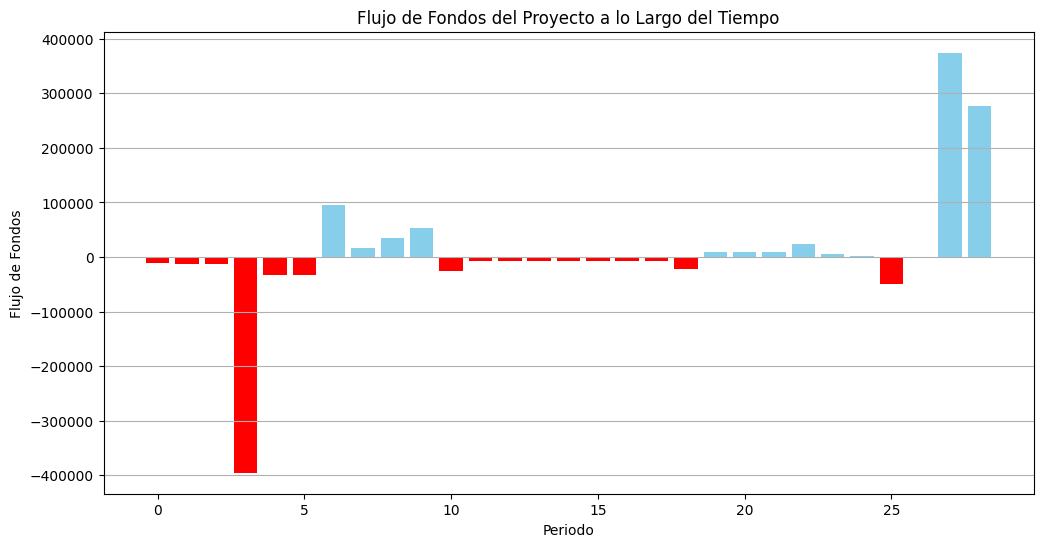

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create a list of colors based on the cash flow values
colors = ['skyblue' if x >= 0 else 'red' for x in flujo_construccion]

plt.bar(range(len(flujo_construccion)), flujo_construccion, color=colors)
plt.title('Flujo de Fondos del Proyecto a lo Largo del Tiempo')
plt.xlabel('Periodo')
plt.ylabel('Flujo de Fondos')
plt.grid(axis='y')
plt.show()

In [44]:
flujo_descontado = []
for t in range(len(flujo_construccion)):
    discounted_cf = flujo_construccion[t] / (1 + ko_mensual)**t
    flujo_descontado.append(discounted_cf)

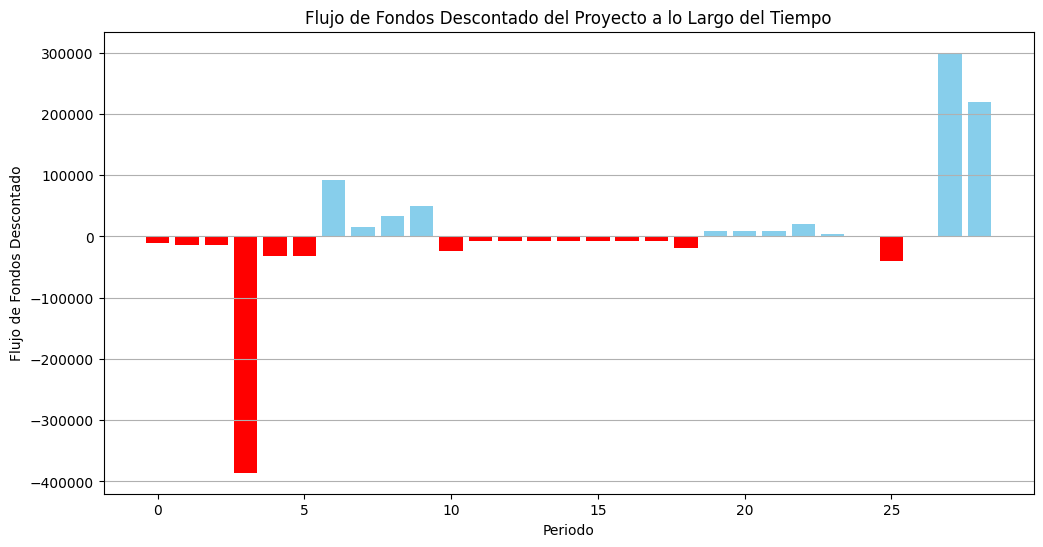

In [45]:
plt.figure(figsize=(12, 6))
colors = ['skyblue' if x >= 0 else 'red' for x in flujo_descontado]
plt.bar(range(len(flujo_descontado)), flujo_descontado, color=colors)
plt.title('Flujo de Fondos Descontado del Proyecto a lo Largo del Tiempo')
plt.xlabel('Periodo')
plt.ylabel('Flujo de Fondos Descontado')
plt.grid(axis='y')
plt.show()

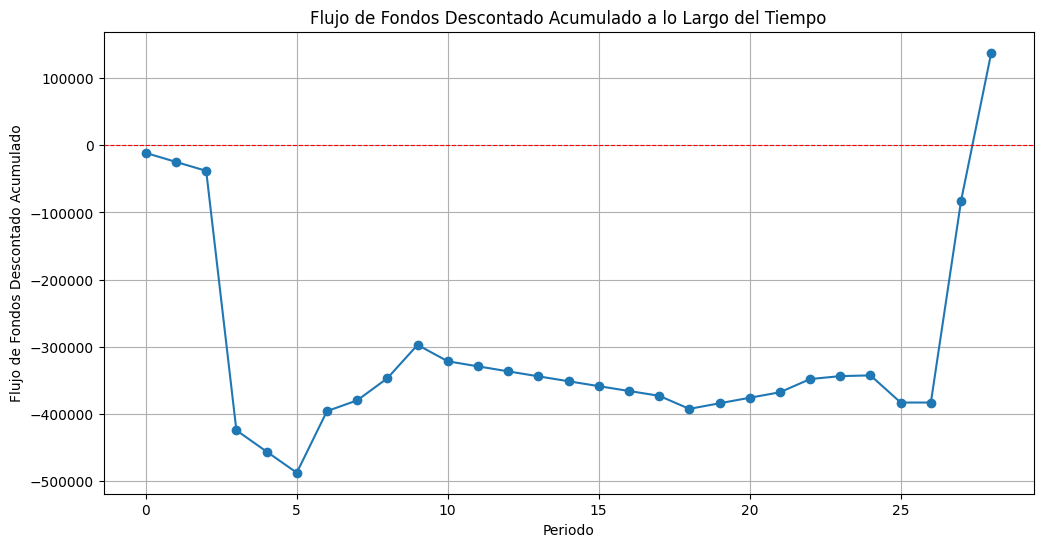

In [46]:
flujo_descontado_acumulado_lista = np.cumsum(flujo_descontado)

plt.figure(figsize=(12, 6))
plt.plot(range(len(flujo_descontado_acumulado_lista)), flujo_descontado_acumulado_lista, marker='o', linestyle='-')
plt.title('Flujo de Fondos Descontado Acumulado a lo Largo del Tiempo')
plt.xlabel('Periodo')
plt.ylabel('Flujo de Fondos Descontado Acumulado')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Línea en VAN = 0
plt.show()

Veamos que sucede si agregamos el riesgo país al cálculo del costo del capital

---



In [47]:
rf=4
beta=1.45
rm=8.5
rp=11.62
ko_anual_rp=rf+beta*(rm-rf)+rp
print(ko_anual_rp)

22.144999999999996


In [48]:
ko_mensual_rp=(1+(ko_anual_rp/100))**(30/365)-1
print(ko_mensual_rp)

0.016577440996070614


In [49]:
# Calculamos el VAN
van_nuevos_rp = nf.npv(ko_mensual_rp, flujo_construccion)
print(f"\nEl Valor Actual Neto (VAN) considerando el riesgo país es: {van_nuevos_rp:.2f}")


El Valor Actual Neto (VAN) considerando el riesgo país es: 43323.93


In [50]:
# Calculamos la TIR
tir_construccion = nf.irr(flujo_construccion)
print(f"La Tasa Interna de Retorno (TIR) es: {tir_construccion:.2%}")

La Tasa Interna de Retorno (TIR) es: 2.12%


In [51]:
# Calculamos la TIRM

tirm_nuevos_rp = nf.mirr(flujo_construccion, ko_mensual_rp, tir_construccion)
print(f"La Tasa Interna de Retorno Modificada (TIRM) es: {tirm_nuevos_rp:.2%}")

La Tasa Interna de Retorno Modificada (TIRM) es: 2.03%


In [52]:
# Calculamos el PRD (Periodo de Recuperación Descontado) considerando el riesgo país
flujo_descontado_acumulado_rp = 0
prd_contruccion_rp = None

for t in range(len(flujo_construccion)):
    # Calcular el flujo de caja descontado para el período actual
    if t == 0:
        flujo_descontado_periodo_rp = flujo_construccion[t]
    else:
        flujo_descontado_periodo_rp = flujo_construccion[t] / (1 + ko_mensual_rp)**t

    # Actualizar el flujo de caja descontado acumulado
    flujo_descontado_acumulado_rp += flujo_descontado_periodo_rp

    # Verificar si el flujo de caja descontado acumulado es positivo y el PRD no ha sido establecido
    if flujo_descontado_acumulado_rp >= 0 and prd_contruccion_rp is None:
        # El período de recuperación está en este período (t)
        # Calcular el flujo de caja descontado acumulado antes de este período
        flujo_descontado_acumulado_anterior_rp = flujo_descontado_acumulado_rp - flujo_descontado_periodo_rp

        # Calcular la cantidad restante necesaria para llegar a cero
        cantidad_restante_descontada_rp = abs(flujo_descontado_acumulado_anterior_rp)

        # Calcular la parte fraccional del período usando interpolación lineal
        # La parte fraccional es la cantidad restante necesaria dividida por el flujo de caja descontado del período actual
        # Usamos abs(flujo_descontado_periodo) para manejar casos en los que el flujo descontado podría ser negativo pero el acumulado se está volviendo positivo
        periodo_fraccional_rp = cantidad_restante_descontada_rp / abs(flujo_descontado_periodo_rp)

        # El período de recuperación es el período anterior (t-1) más la parte fraccional
        prd_contruccion_rp = t -1 + periodo_fraccional_rp
        break # Salir del bucle una vez que se encuentra el PRD

if prd_contruccion_rp is not None:
    # Convertir meses a años para la salida final
    prd_años_rp = prd_contruccion_rp / 12
    print(f"El Periodo de Recuperación Descontado (PRD) considerando el riesgo país es: {prd_años_rp:.2f} años")
else:
    print("La inversión inicial no se recupera dentro del período del análisis descontado con riesgo país.")

El Periodo de Recuperación Descontado (PRD) considerando el riesgo país es: 2.31 años


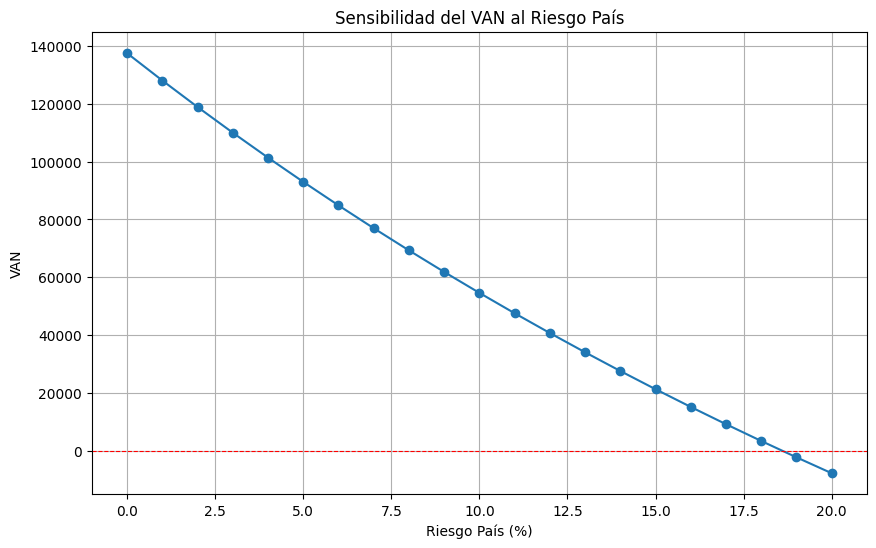

In [53]:
# Crear un rango de valores para el riesgo país
riesgo_pais_rango = np.arange(0, 21, 1)

# Listas para almacenar los valores del VAN
van_por_riesgo_pais = []

# Calcular el VAN para cada valor de riesgo país
for rp_value in riesgo_pais_rango:
    # Recalcular el costo de capital anual y mensual con el nuevo riesgo país
    ko_anual_rp_sensitivity = rf + beta * (rm - rf) + rp_value
    ko_mensual_rp_sensitivity = (1 + (ko_anual_rp_sensitivity / 100))**(30/365) - 1

    # Calcular el VAN con el nuevo costo de capital
    van_sensitivity = nf.npv(ko_mensual_rp_sensitivity, flujo_construccion)
    van_por_riesgo_pais.append(van_sensitivity)

# Visualizar la sensibilidad del VAN al riesgo país
plt.figure(figsize=(10, 6))
plt.plot(riesgo_pais_rango, van_por_riesgo_pais, marker='o', linestyle='-')
plt.title('Sensibilidad del VAN al Riesgo País')
plt.xlabel('Riesgo País (%)')
plt.ylabel('VAN')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Línea en VAN = 0
plt.show()

veamos la comparativa

---



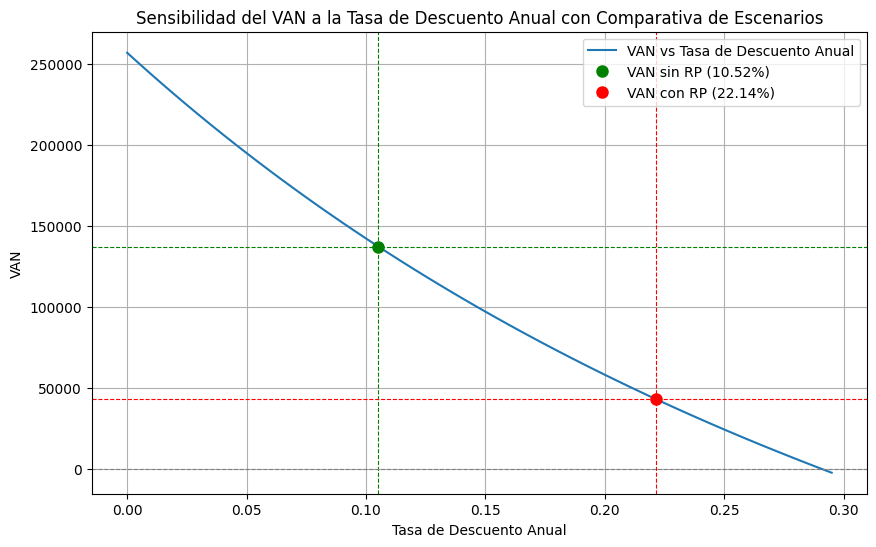

In [54]:
# Definimos los flujos de caja del proyecto
flujos_van = flujo_construccion

# ko_anual = rf + beta * (rm - rf)
# ko_anual_rp = rf + beta * (rm - rf) + rp


tasas_descuento_anual_rango = np.arange(0, 0.30, 0.005)

tasas_descuento_mensual_rango = (1 + tasas_descuento_anual_rango)**(30/365) - 1

# Calculamos el VAN para cada tasa mensual
van_sensitivity_annual_rates = [nf.npv(tasa_mensual, flujos_van) for tasa_mensual in tasas_descuento_mensual_rango]

# Visualizamos la sensibilidad del VAN a distintas tasas de descuento anuales
plt.figure(figsize=(10, 6))
plt.plot(tasas_descuento_anual_rango, van_sensitivity_annual_rates, linestyle='-', label='VAN vs Tasa de Descuento Anual')


# escenario sin riesgo país
plt.plot(ko_anual/100, van_nuevos, 'go', markersize=8, label=f'VAN sin RP ({ko_anual:.2f}%)')
plt.axvline(ko_anual/100, color='green', linestyle='--', linewidth=0.8)
plt.axhline(van_nuevos, color='green', linestyle='--', linewidth=0.8)

# escenario con riesgo país
plt.plot(ko_anual_rp/100, van_nuevos_rp, 'ro', markersize=8, label=f'VAN con RP ({ko_anual_rp:.2f}%)')
plt.axvline(ko_anual_rp/100, color='red', linestyle='--', linewidth=0.8)
plt.axhline(van_nuevos_rp, color='red', linestyle='--', linewidth=0.8)


plt.title('Sensibilidad del VAN a la Tasa de Descuento Anual con Comparativa de Escenarios')
plt.xlabel('Tasa de Descuento Anual')
plt.ylabel('VAN')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Línea en VAN = 0
plt.legend()
plt.show()

Ejemplo integrador 2

---



/tmp/ipykernel_2680512/3761379057.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2024-11-01", end="2025-11-01")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: DNSError('Failed to perform, curl: (6) Could not resolve host: query1.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


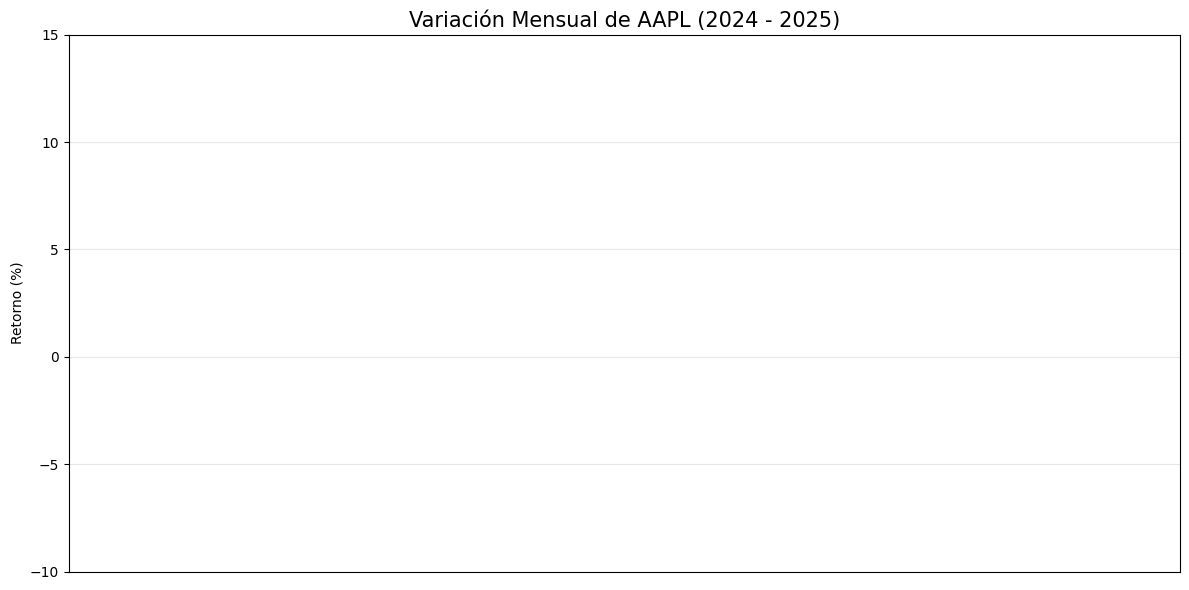

In [55]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Descargar datos de Apple
data = yf.download("AAPL", start="2024-11-01", end="2025-11-01")

# Procesar datos correctamente
monthly = data['Close'].resample('ME').last()  # Esto devuelve una Serie
monthly_pct = monthly.pct_change().dropna() * 100

# Convertir a formato adecuado para gráfico
months = monthly_pct.index.strftime('%b').tolist()  # Convertir a lista explícita
returns = monthly_pct.to_numpy().flatten()  # Aplanar el array numpy

# Gráfico simplificado
plt.figure(figsize=(12, 6))

# Dibujar cada barra individualmente
for i, (month, ret) in enumerate(zip(months, returns)):
    color = 'green' if ret > 0 else 'red'
    plt.bar(i, ret, color=color)  # Usar índice numérico

# Configurar ejes
plt.xticks(range(len(months)), months)
plt.title('Variación Mensual de AAPL (2024 - 2025)', fontsize=15)
plt.ylabel('Retorno (%)')

# Añadir etiquetas (asegurarse que ret es un escalar)
for i, (month, ret) in enumerate(zip(months, returns)):
    plt.text(i,
             ret + (0.3 if ret > 0 else -0.8),
             f'{ret.item():.1f}%',  # Usar .item() para obtener escalar
             ha='center',
             va='bottom' if ret > 0 else 'top',
             color='black')

plt.grid(axis='y', alpha=0.3)
plt.ylim(-10, 15)
plt.tight_layout()
plt.show()

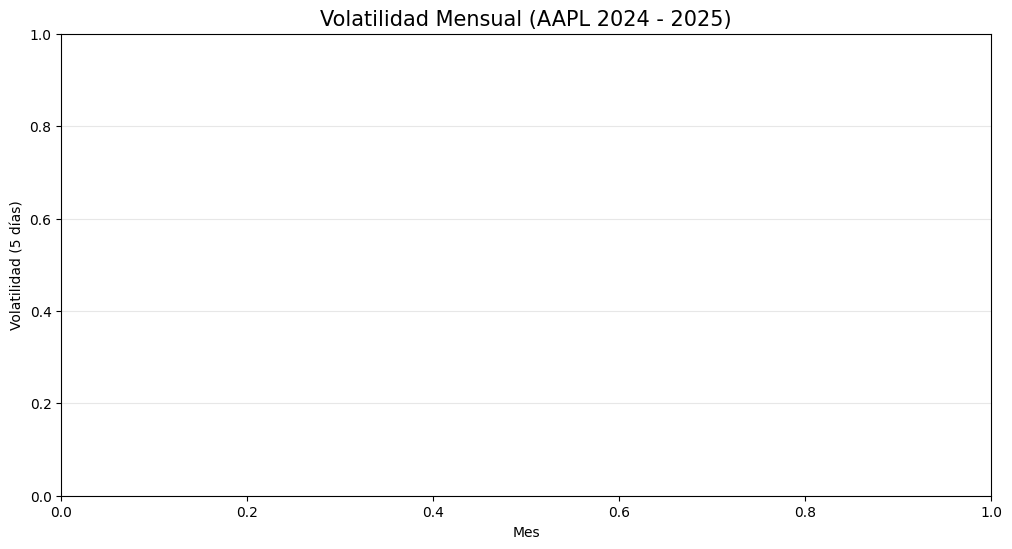

In [56]:
import seaborn as sns

# Calcular volatilidad
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(5).std()
data['Month'] = data.index.month_name().str[:3]

# Boxplot básico con DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Volatility', data=data, showfliers=False,
            order=['Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct'])

plt.title('Volatilidad Mensual (AAPL 2024 - 2025)', fontsize=15)
plt.xlabel('Mes')
plt.ylabel('Volatilidad (5 días)')
plt.grid(axis='y', alpha=0.3)
plt.show()

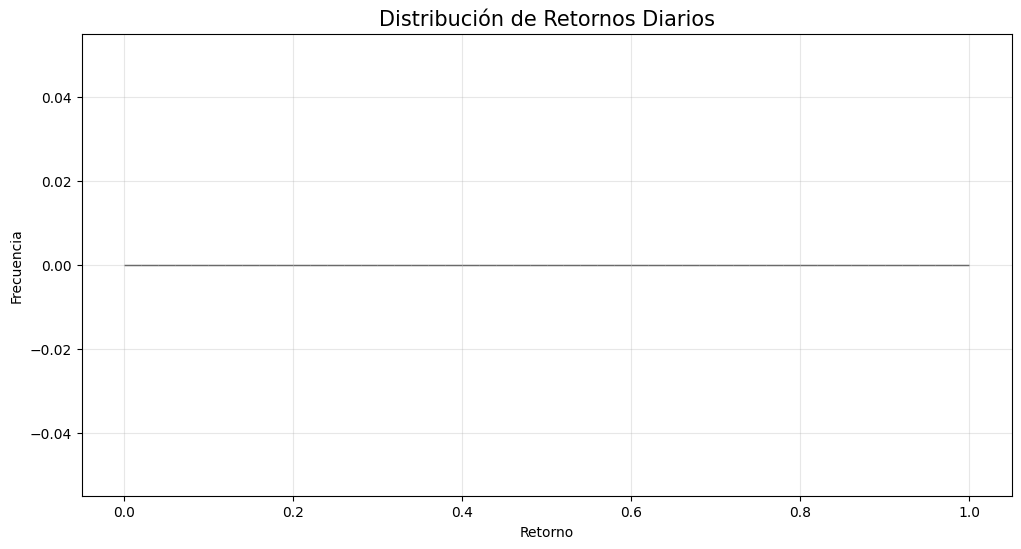

In [57]:
# Histograma simple
returns = data['Daily_Return'].dropna().to_numpy().flatten()

plt.figure(figsize=(12, 6))
plt.hist(returns, bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribución de Retornos Diarios', fontsize=15)
plt.xlabel('Retorno')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

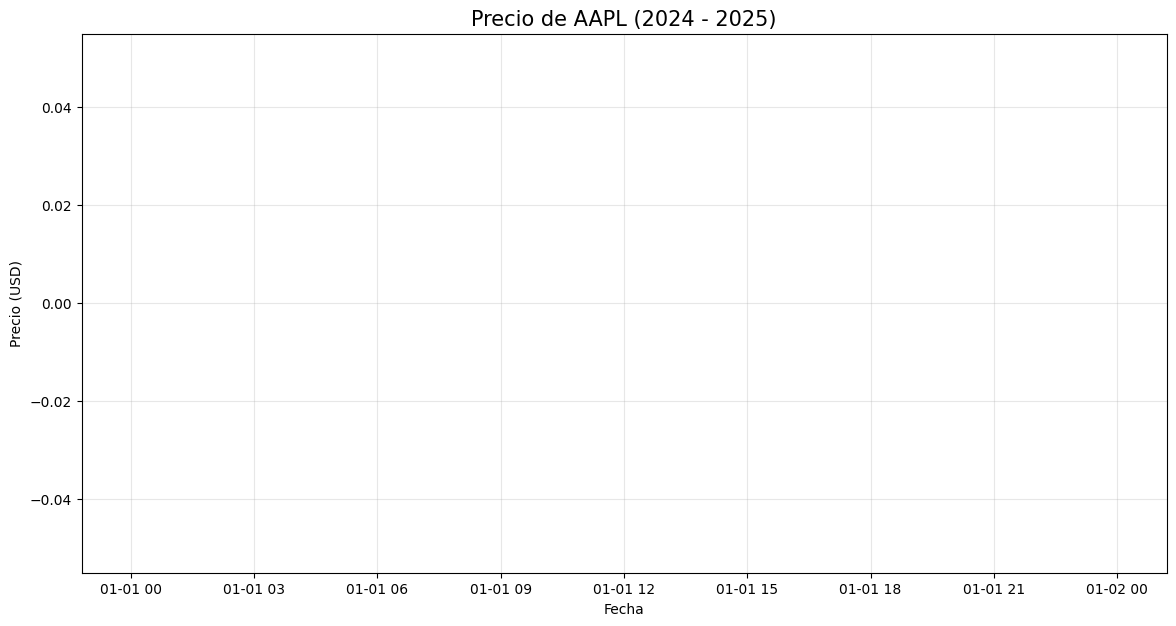

In [58]:
# Gráfico de línea básico
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], color='blue')

plt.title('Precio de AAPL (2024 - 2025)', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(alpha=0.3)
plt.show()

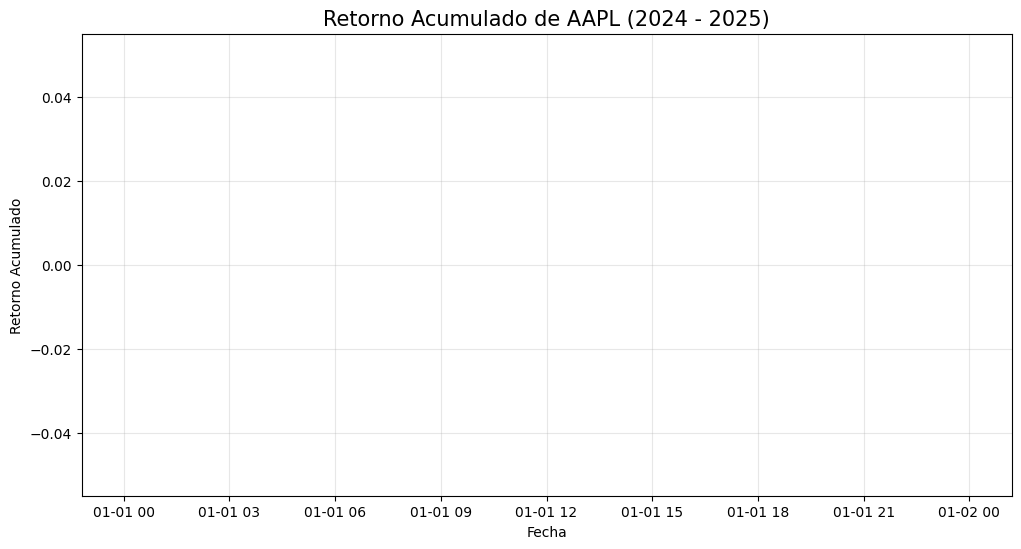

In [59]:
# Calcular retornos acumulados
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod() - 1

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Return'], color='purple')
plt.title('Retorno Acumulado de AAPL (2024 - 2025)', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Retorno Acumulado')
plt.grid(alpha=0.3)
plt.show()

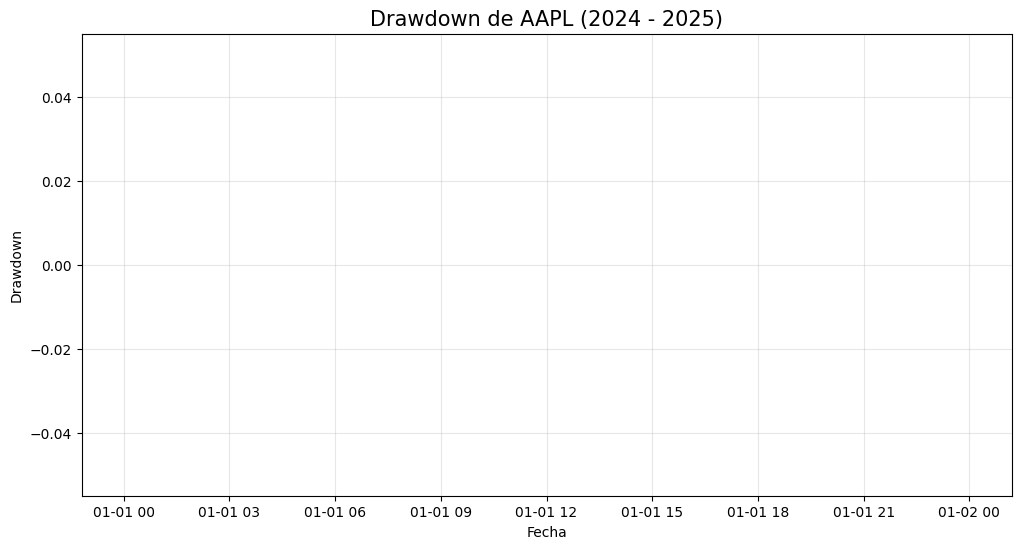


El Drawdown Máximo es: nan%


In [60]:
# Calcular Drawdowns
# Calcular el pico (máximo valor acumulado hasta la fecha)
data['Peak'] = data['Cumulative_Return'].cummax()

# Calcular el Drawdown
data['Drawdown'] = data['Cumulative_Return'] - data['Peak']

# Visualizar los Drawdowns
plt.figure(figsize=(12, 6))
plt.fill_between(data.index, data['Drawdown'], color='salmon', alpha=0.5)
plt.title('Drawdown de AAPL (2024 - 2025)', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Drawdown')
plt.grid(alpha=0.3)
plt.show()

# Encontrar el Drawdown Máximo
max_drawdown = data['Drawdown'].min()
print(f"\nEl Drawdown Máximo es: {max_drawdown:.2%}")

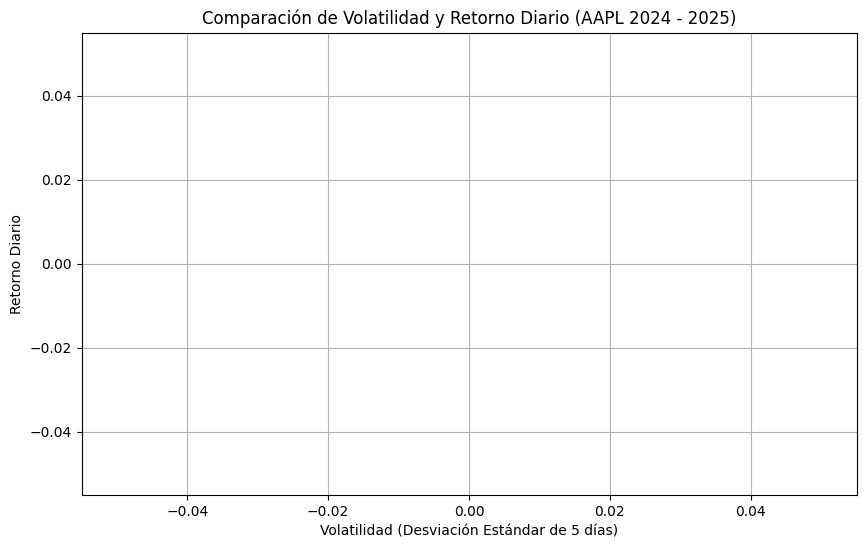

In [61]:
# Visualizar la relación entre Volatilidad y Retorno Diario
plt.figure(figsize=(10, 6))
plt.scatter(data['Volatility'], data['Daily_Return'], alpha=0.5)
plt.title('Comparación de Volatilidad y Retorno Diario (AAPL 2024 - 2025)')
plt.xlabel('Volatilidad (Desviación Estándar de 5 días)')
plt.ylabel('Retorno Diario')
plt.grid(True)
plt.show()

In [62]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Volatility,Cumulative_Return,Peak,Drawdown
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
